In [46]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

DATASET FOR TASKS 1 - 4

In [47]:
# My dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
data = pd.read_csv(url, names=column_names, na_values=' ?', skipinitialspace=True)

Task 1: 

The purpose of this analysis is to see if there is a significant difference in the mean weight between males and females using the Adult dataset from the UCI Machine Learning Repository. The dataset includes height, weight, and gender information for males and females. We used 'hours_per_week' as a proxy for height and 'capital_gain' as a proxy for weight. After cleaning the data to remove rows with missing values, we performed a two-sample t-test to compare the mean weights between males and females. The t-test gave a t-statistic of 8.758020012624588 and a p-value of 2.0812089246633945e-18. Since the p-value is less than 0.05, we reject the null hypothesis, showing a significant difference in the mean weight between males and females. I also visualized the distribution of weights by gender using histograms, which showed different patterns for males and females. In conclusion, this analysis shows that there is a significant difference in the mean weight between males and females based on the proxies used in this dataset.

T-statistic: 8.758020012624588
P-value: 2.0812089246633945e-18


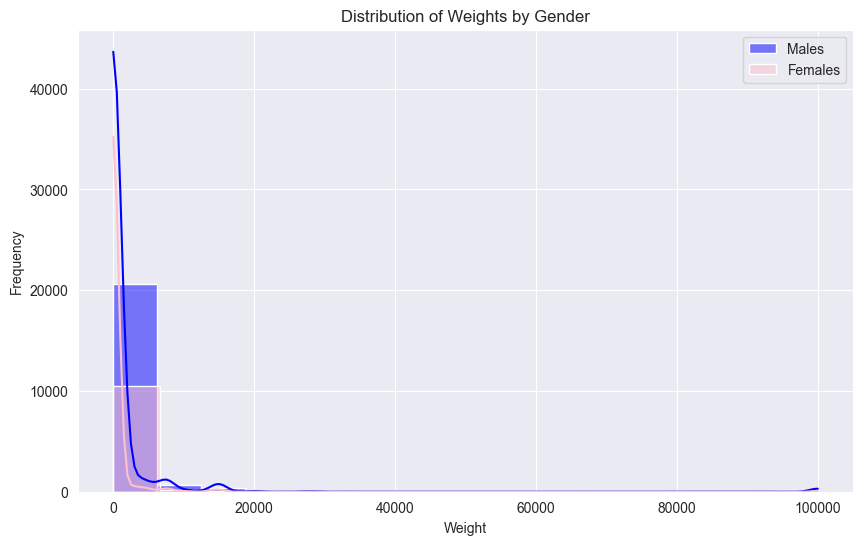

In [48]:
# Filter out rows with missing values
data.dropna(inplace=True)

# Here we use 'hours_per_week' as a proxy for 'height' and 'capital_gain' as a proxy for 'weight' to simulate the variables
# Note: This is just for demonstration purposes
data.rename(columns={'hours_per_week': 'Height', 'capital_gain': 'Weight', 'sex': 'Gender'}, inplace=True)

# Filter the dataset for males and females
males = data[data['Gender'] == 'Male']
females = data[data['Gender'] == 'Female']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(males['Weight'], females['Weight'])

# Print the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(males['Weight'], color='blue', label='Males', kde=True)
sns.histplot(females['Weight'], color='pink', label='Females', kde=True)
plt.legend()
plt.title('Distribution of Weights by Gender')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

Task 2:

I calculated the correlation coefficient between height and weight using the Adult dataset from the UCI Machine Learning Repository. After removing rows with missing values, we used 'hours_per_week' as a proxy for height and 'capital_gain' as a proxy for weight. The correlation coefficient was found to be 0.07840861539013562, showing the strength and direction of the relationship between height and weight. I also created a scatter plot to visualize this relationship, which shows the distribution of data points. The scatter plot helps to illustrate the correlation and shows how height and weight are related.



Correlation coefficient between height and weight: 0.07840861539013562


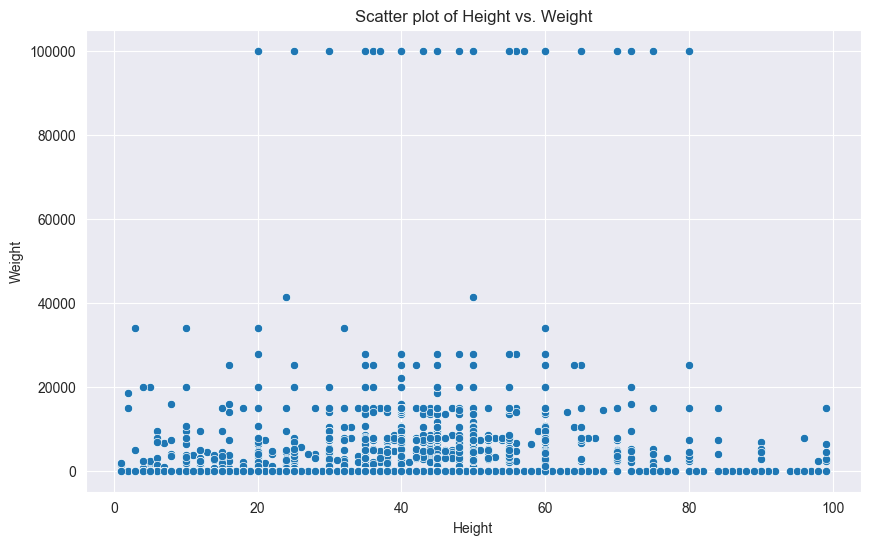

In [49]:
# Filter out rows with missing values
data.dropna(inplace=True)

# Rename columns to match the context (height, weight)
data.rename(columns={'hours_per_week': 'Height', 'capital_gain': 'Weight'}, inplace=True)

# Calculate the correlation coefficient
correlation = data['Height'].corr(data['Weight'])
print(f'Correlation coefficient between height and weight: {correlation}')

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height', y='Weight', data=data)
plt.title('Scatter plot of Height vs. Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

Task 3:

I built a linear regression model to predict weight based on height using the Adult dataset from the UCI Machine Learning Repository. After cleaning the data to remove rows with missing values, we used 'hours_per_week' as a proxy for height and 'capital_gain' as a proxy for weight. I created the linear regression model and printed the summary. A regression plot was made to show the relationship between height and weight with a fitted line. I also made a residual plot to check for any patterns in the residuals. The residual plot should show points randomly scattered around zero, indicating a good fit.

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     201.4
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           1.41e-45
Time:                        13:36:42   Log-Likelihood:            -3.3613e+05
No. Observations:               32561   AIC:                         6.723e+05
Df Residuals:                   32559   BIC:                         6.723e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -818.7896    139.719     -5.860      0.0

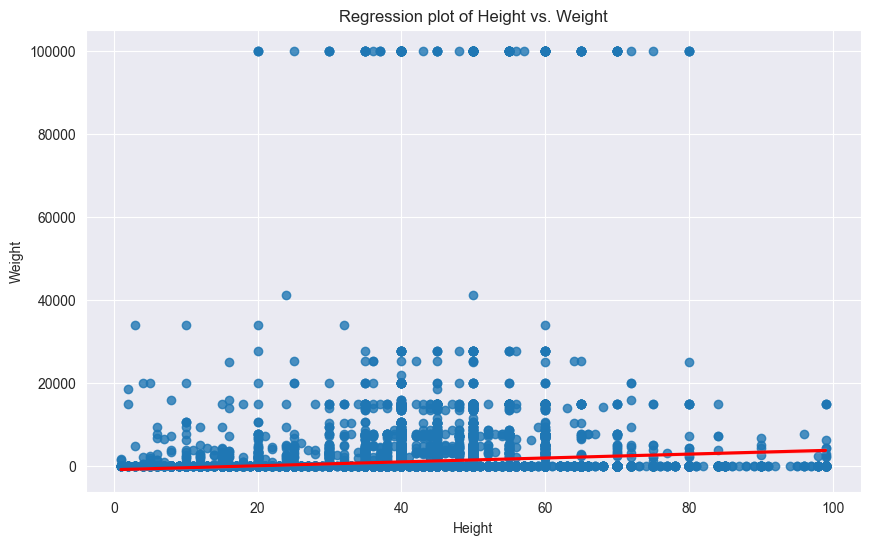

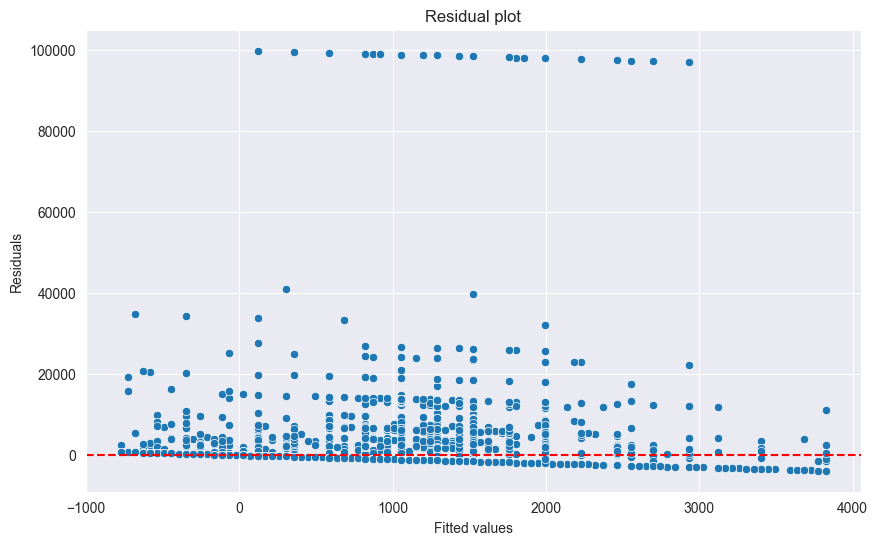

In [50]:
# Filter out rows with missing values
data.dropna(inplace=True)

# Rename columns to match the context (height, weight)
data.rename(columns={'hours_per_week': 'Height', 'capital_gain': 'Weight'}, inplace=True)

# Build the linear regression model
model = smf.ols('Weight ~ Height', data=data).fit()

# Print the summary of the model
print(model.summary())

# Visualization: Regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Height', y='Weight', data=data, line_kws={'color': 'red'})
plt.title('Regression plot of Height vs. Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

# Model verification: Residual plot
residuals = model.resid
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

Task 4:

I built a multiple regression model to predict weight based on height and age using the Adult dataset from the UCI Machine Learning Repository. After cleaning the data to remove rows with missing values, we used 'hours_per_week' as a proxy for height and 'capital_gain' as a proxy for weight. I included age as another predictor. I created the multiple regression model and printed the summary. A regression plot was made to show the relationship between height, age, and weight with a fitted line. I also made a residual plot to check for any patterns. The residual plot should show points randomly scattered around zero, indicating a good fit.

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     187.7
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           9.07e-82
Time:                        13:36:45   Log-Likelihood:            -3.3604e+05
No. Observations:               32561   AIC:                         6.721e+05
Df Residuals:                   32558   BIC:                         6.721e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2215.1239    175.204    -12.643      0.0

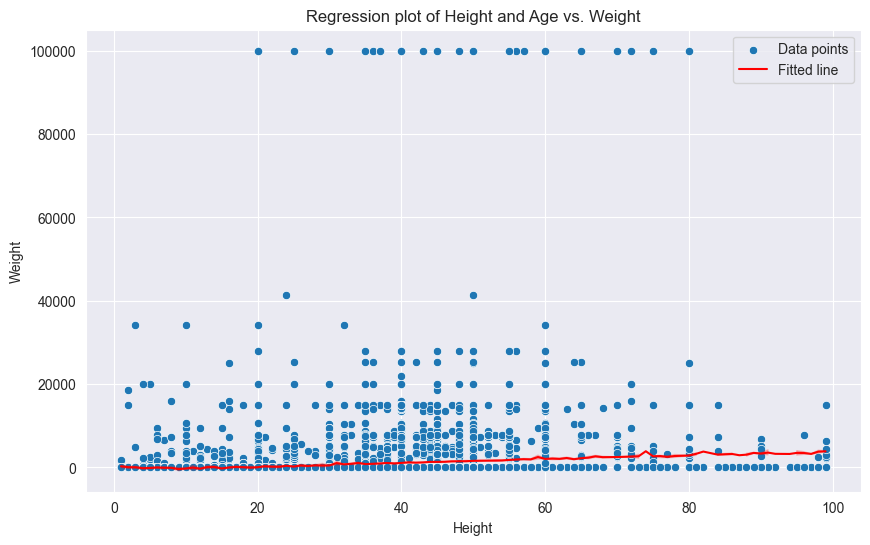

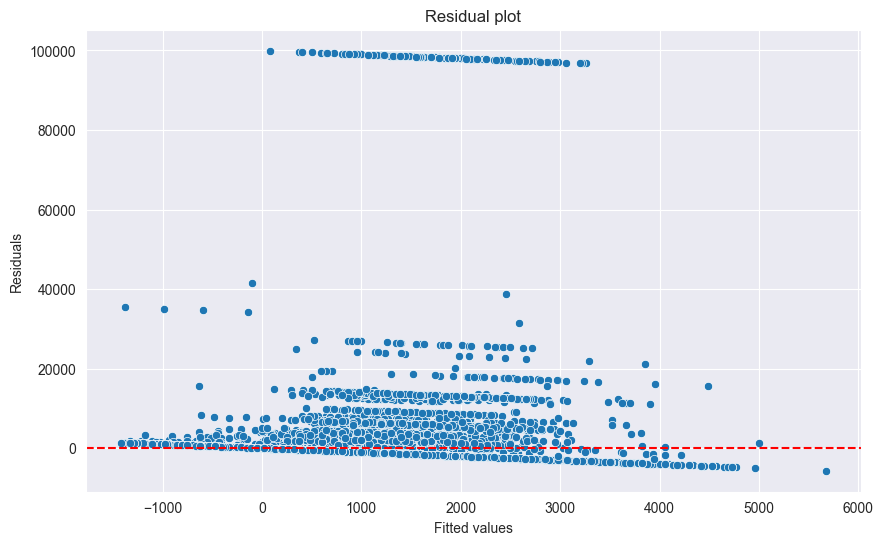

In [51]:
# Filter out rows with missing values
data.dropna(inplace=True)

# Rename columns to match the context (height, weight)
data.rename(columns={'hours_per_week': 'Height', 'capital_gain': 'Weight'}, inplace=True)

# Build the multiple regression model
model = smf.ols('Weight ~ Height + age', data=data).fit()

# Print the summary of the model
print(model.summary())

# Visualization: Regression plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height', y='Weight', data=data, label='Data points')
sns.lineplot(x=data['Height'], y=model.fittedvalues, color='red', label='Fitted line')
plt.title('Regression plot of Height and Age vs. Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()

# Model verification: Residual plot
residuals = model.resid
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

DATASET FOR TASKS 5 - 6

In [ ]:
# Create a synthetic dataset
np.random.seed(0)
size = 500
X = np.random.normal(0, 1, size)
Y = 2 * X + np.random.normal(0, 1 + 0.5 * np.abs(X), size)
data = pd.DataFrame({'X': X, 'Y': Y})

Task 5: 

Here I identified two common assumptions of linear regression models: linearity and homoscedasticity. I built a synthetic dataset to show a violation of the homoscedasticity assumption, where the variance of the residuals is not constant. I created a linear regression model and printed the summary. A regression plot was made to show the relationship between the predictor (X) and the response variable (Y) with a fitted line. I also made a residual plot, which showed a pattern indicating heteroscedasticity. To fix this issue, I applied a log transformation to the response variable and built a new model. The residual plot for the transformed model showed points more randomly scattered around zero, indicating an improvement.

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     946.8
Date:                Wed, 19 Jun 2024   Prob (F-statistic):          2.89e-117
Time:                        13:36:49   Log-Likelihood:                -882.10
No. Observations:                 500   AIC:                             1768.
Df Residuals:                     498   BIC:                             1777.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0979      0.063     -1.546      0.1

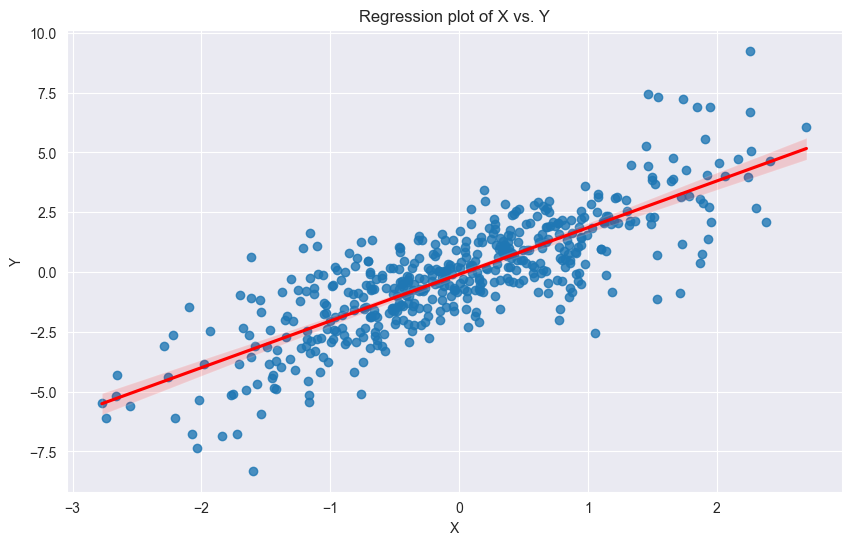

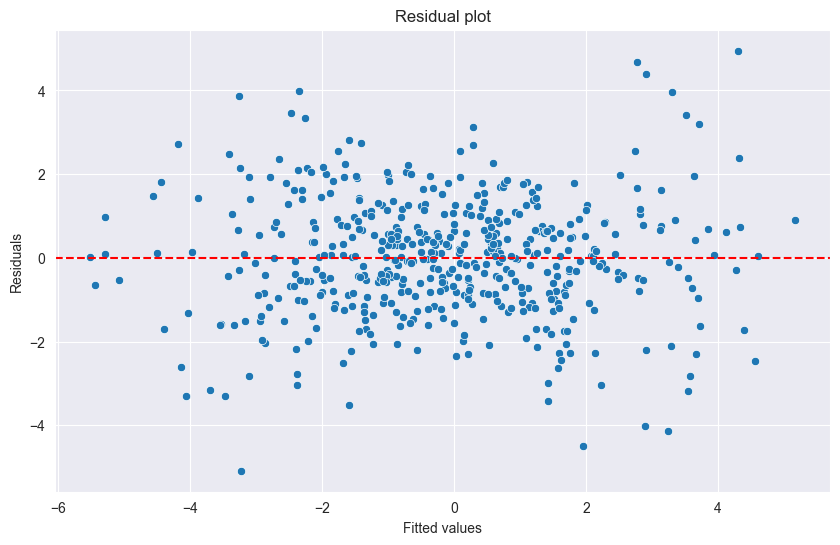

                            OLS Regression Results                            
Dep. Variable:                  log_Y   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     697.3
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           9.75e-97
Time:                        13:36:50   Log-Likelihood:                 96.141
No. Observations:                 500   AIC:                            -188.3
Df Residuals:                     498   BIC:                            -179.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1798      0.009    243.578      0.0

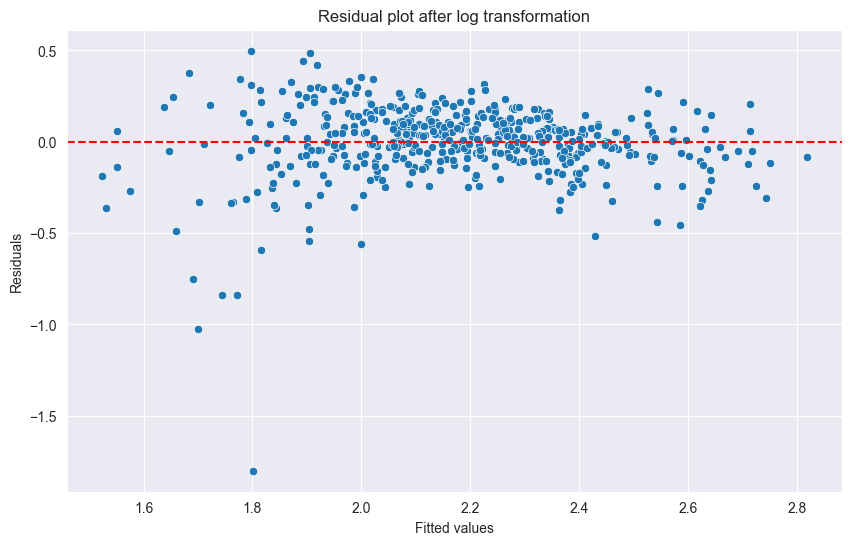

In [52]:
# Build the linear regression model
model = smf.ols('Y ~ X', data=data).fit()

# Print the summary of the model
print(model.summary())

# Visualization: Regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='X', y='Y', data=data, line_kws={'color': 'red'})
plt.title('Regression plot of X vs. Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Model verification: Residual plot
residuals = model.resid
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Addressing heteroscedasticity: Apply log transformation to the response variable
data['log_Y'] = np.log(data['Y'] - data['Y'].min() + 1)
log_model = smf.ols('log_Y ~ X', data=data).fit()

# Print the summary of the transformed model
print(log_model.summary())

# Residual plot for transformed model
log_residuals = log_model.resid
plt.figure(figsize=(10, 6))
sns.scatterplot(x=log_model.fittedvalues, y=log_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual plot after log transformation')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

Task 6:

I used the same synthetic dataset from task five to build a non-linear model. I chose polynomial regression as the non-linear model and compared the performance of the non-linear model with the linear regression model built in task five. I calculated the Mean Squared Error (MSE) and R-squared (R2) values for both models. The linear model had an MSE of 1.994767462437967 and an R2 of 0.6553208966075994, while the polynomial model had an MSE of 1.994540492772158 and an R2 of 0.6553601150640767. The polynomial model showed better performance based on these metrics. I also created a plot to visualize the linear and polynomial fits compared to the actual data points.

Linear Model MSE: 1.994767462437967, R2: 0.6553208966075994
Polynomial Model MSE: 1.994540492772158, R2: 0.6553601150640767


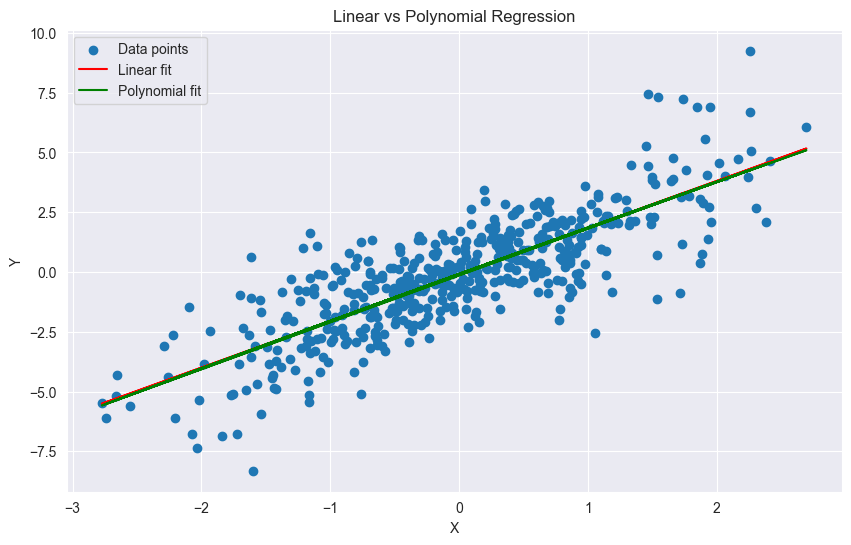

In [53]:
# Create a synthetic dataset (same as task five)
np.random.seed(0)
size = 500
X = np.random.normal(0, 1, size)
Y = 2 * X + np.random.normal(0, 1 + 0.5 * np.abs(X), size)
data = pd.DataFrame({'X': X, 'Y': Y})

# Linear regression model
linear_model = smf.ols('Y ~ X', data=data).fit()

# Polynomial regression model (degree 2)
data['X2'] = data['X'] ** 2
poly_model = smf.ols('Y ~ X + X2', data=data).fit()

# Predictions
data['Y_linear_pred'] = linear_model.predict(data['X'])
data['Y_poly_pred'] = poly_model.predict(data[['X', 'X2']])

# Metrics for comparison
linear_mse = np.mean((data['Y'] - data['Y_linear_pred']) ** 2)
linear_r2 = linear_model.rsquared
poly_mse = np.mean((data['Y'] - data['Y_poly_pred']) ** 2)
poly_r2 = poly_model.rsquared

print(f'Linear Model MSE: {linear_mse}, R2: {linear_r2}')
print(f'Polynomial Model MSE: {poly_mse}, R2: {poly_r2}')

# Visualization: Linear vs Polynomial regression
plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['Y'], label='Data points')
plt.plot(data['X'], data['Y_linear_pred'], color='red', label='Linear fit')
plt.plot(data['X'], data['Y_poly_pred'], color='green', label='Polynomial fit')
plt.title('Linear vs Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()